In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train =  pd.read_csv("data/Train.csv")
test = pd.read_csv("data/Test.csv")

In [4]:
test_id = test['ID'].tolist()

In [5]:
train.head()

,ID,location,temp,precip,rel_humidity,wind_dir,wind_spd,atmos_press,target
0,ID_train_0,C,"nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...",45.126304
1,ID_train_1,D,"22.53333333,21.71666667,20.83333333,20.9833333...","0.102,0.0,0.0,0.0,0.0,0.0,0.0,0.034,0.017,0.01...","0.744583333,0.808083333,0.911166667,0.91633333...","281.6643101,89.15629262,81.96853891,291.018632...","2.3775,1.126666667,0.700833333,0.3416666670000...","90.32,90.3775,90.44083333,90.4725,90.45416667,...",79.131702
2,ID_train_10,A,"28.975,27.95,29.6,26.425,22.09166667,21.775,22...","0.0,0.0,0.0,0.102,0.136,0.0,0.0,2.16,1.276,0.0...","0.573333333,0.597166667,0.5668333329999999,0.6...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na...","88.55166667,88.46416667,88.31916667,88.24,88.2...",32.661304
3,ID_train_100,A,"22.96666667,24.26666667,25.275,25.625,25.86666...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.77,3.012,1.0...","0.8430833329999999,0.79025,0.7375,0.728,0.7049...","300.0850574,293.6769595,294.5174647,301.921416...","1.446666667,1.1925,1.324166667,1.5441666669999...","88.615,88.53083333,88.4,88.27166667,88.2075,88...",53.850238
4,ID_train_1000,A,"21.875,21.575,21.525,21.43333333,20.50833333,1...","0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0....","0.8564166670000001,0.874916667,0.879833333,0.8...","21.83997432,17.05405341,89.26406044,123.585424...","0.1975,0.244166667,0.411666667,0.56,0.5775,0.4...","88.55666667,88.64083333,88.65833333,88.6475,88...",177.418750


In [6]:
print('Dataset keys:', train.keys())

Dataset keys: Index(['ID', 'location', 'temp', 'precip', 'rel_humidity', 'wind_dir',
       'wind_spd', 'atmos_press', 'target'],
      dtype='object')


In [7]:
def parse_ts_data(ts):
    """
    Inputs
    ts: a time series readings as string of comma separated values
    Outputs
    parsed_ts: numpy array of readings
    """
    ts = ts.replace("nan","-100").split(",") #replace nans with value differnt from all input values
    parsed_ts = np.array([float(t) for t in ts])
    return parsed_ts

def extract_time_series(df, feat_name):
    return np.array(df[feat_name].apply(lambda ts: parse_ts_data(ts)).tolist())

In [8]:
feat_name_arr = ['temp', 'precip', 'rel_humidity', 'wind_dir', 'wind_spd', 'atmos_press']

#Transform training data
train_time_series_feat = np.array([extract_time_series(train, feat_name) for feat_name in feat_name_arr]).transpose(1,2,0)
print('Shape of training data:', train_time_series_feat.shape)

#Transform test data
test_time_series_feat = np.array([extract_time_series(test, feat_name) for feat_name in feat_name_arr]).transpose(1,2,0)
print('Shape of test data:', test_time_series_feat.shape)

Shape of training data: (15539, 121, 6)
Shape of test data: (5035, 121, 6)


### Weather Factors Exploration
Let's plot the histogram of each weather factor

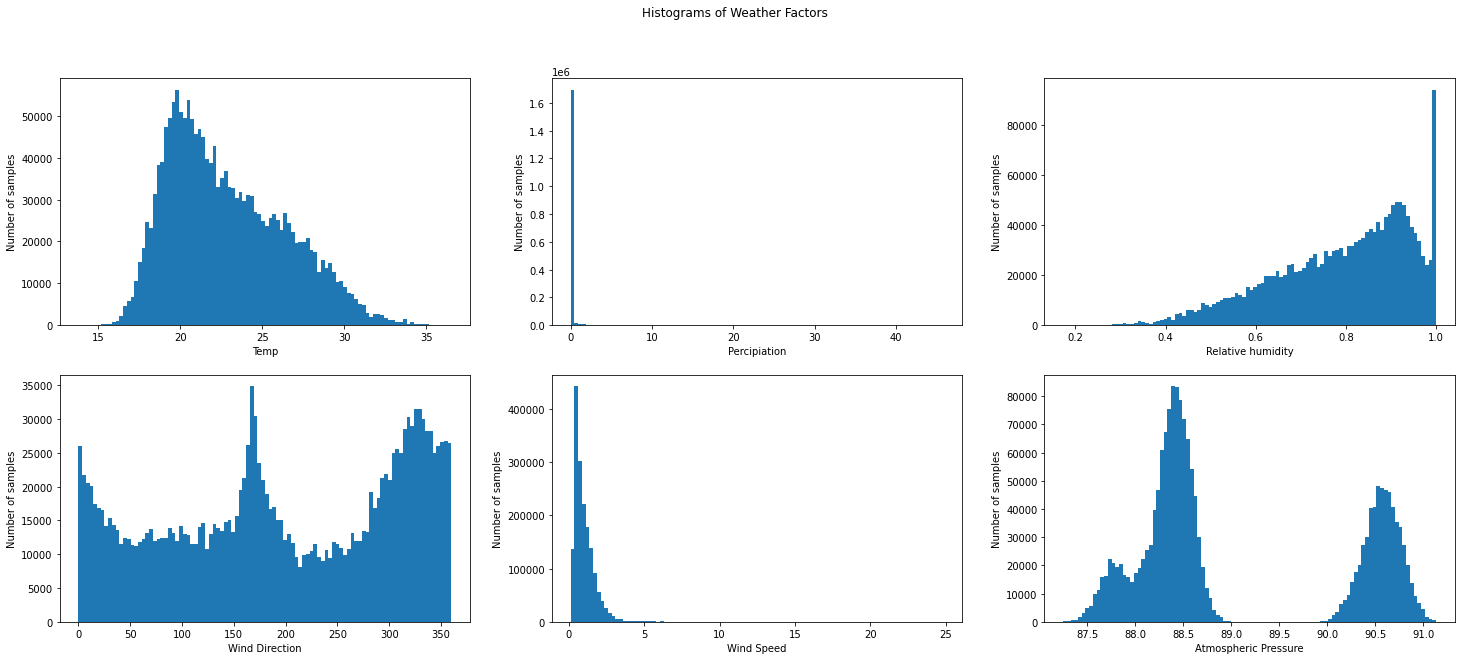

In [10]:
rng = np.arange(121)

fig, axs = plt.subplots(2, 3, figsize=(25,10))

valid_idx = np.where(train_time_series_feat[:,:,0] != -100)
axs[0, 0].hist(train_time_series_feat[:,:,0][valid_idx].flatten(), bins=100)
axs[0, 0].set(xlabel='Temp', ylabel='Number of samples')
valid_idx = np.where(train_time_series_feat[:,:,1] != -100)
axs[0, 1].hist(train_time_series_feat[:,:,1][valid_idx].flatten(), bins=100)
axs[0, 1].set(xlabel='Percipiation', ylabel='Number of samples')
valid_idx = np.where(train_time_series_feat[:,:,2] != -100)
axs[0, 2].hist(train_time_series_feat[:,:,2][valid_idx].flatten(), bins=100)
axs[0, 2].set(xlabel='Relative humidity', ylabel='Number of samples')
valid_idx = np.where(train_time_series_feat[:,:,3] != -100)
axs[1, 0].hist(train_time_series_feat[:,:,3][valid_idx].flatten(), bins=100)
axs[1, 0].set(xlabel='Wind Direction', ylabel='Number of samples')
valid_idx = np.where(train_time_series_feat[:,:,4] != -100)
axs[1, 1].hist(train_time_series_feat[:,:,4][valid_idx].flatten(), bins=100)
axs[1, 1].set(xlabel='Wind Speed', ylabel='Number of samples')
valid_idx = np.where(train_time_series_feat[:,:,5] != -100)
axs[1, 2].hist(train_time_series_feat[:,:,5][valid_idx].flatten(), bins=100)
axs[1, 2].set(xlabel='Atmospheric Pressure', ylabel='Number of samples')


fig.suptitle('Histograms of Weather Factors')
print()

Let's have a look on one sample of the data.

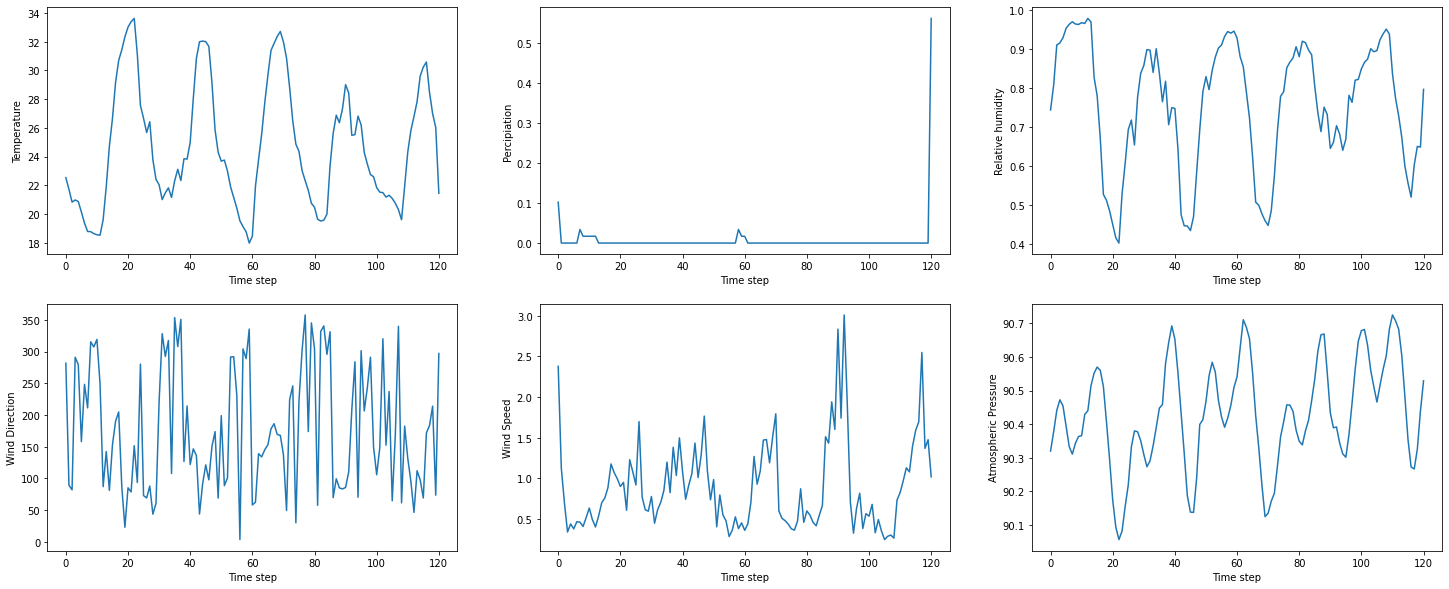

In [11]:
idx = 1

rng = np.arange(121)

fig, axs = plt.subplots(2, 3, figsize=(25,10))

axs[0, 0].plot(rng, train_time_series_feat[idx,:,0])
axs[0, 0].set(xlabel='Time step', ylabel='Temperature')
axs[0, 1].plot(rng, train_time_series_feat[idx,:,1])
axs[0, 1].set(xlabel='Time step', ylabel='Percipiation')
axs[0, 2].plot(rng, train_time_series_feat[idx,:,2])
axs[0, 2].set(xlabel='Time step', ylabel='Relative humidity')
axs[1, 0].plot(rng, train_time_series_feat[idx,:,3])
axs[1, 0].set(xlabel='Time step', ylabel='Wind Direction')
axs[1, 1].plot(rng, train_time_series_feat[idx,:,4])
axs[1, 1].set(xlabel='Time step', ylabel='Wind Speed')
axs[1, 2].plot(rng, train_time_series_feat[idx,:,5])
axs[1, 2].set(xlabel='Time step', ylabel='Atmospheric Pressure')

print()

Let's have a look on the missing values at each time step for each of the weather factors

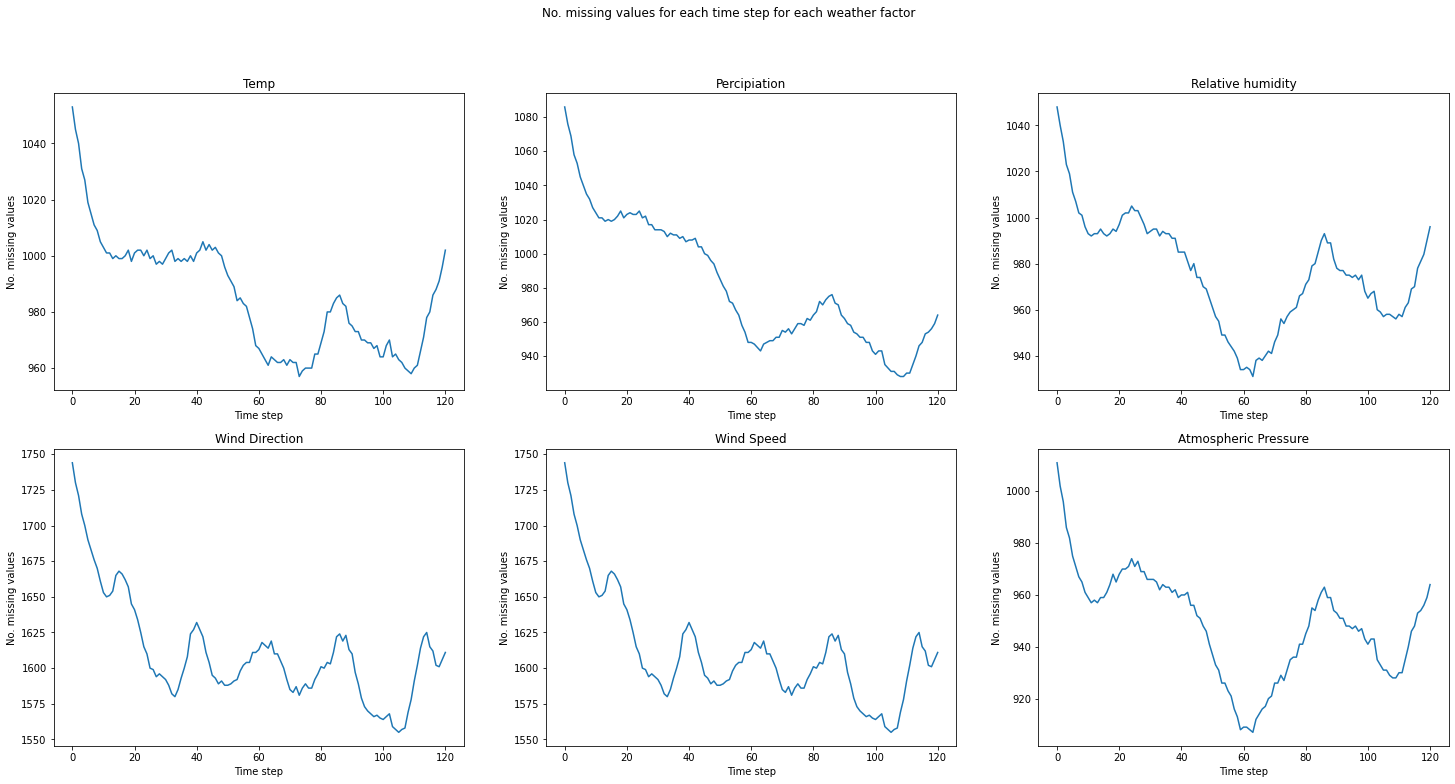

In [12]:
ts_missing_values = (train_time_series_feat == -100).sum(0)

rng = np.arange(121)

fig, axs = plt.subplots(2, 3, figsize=(25,12))

axs[0, 0].plot(rng, ts_missing_values[:,0])
axs[0, 0].set_title('Temp')
axs[0, 0].set(xlabel='Time step', ylabel='No. missing values')
axs[0, 1].plot(rng, ts_missing_values[:,1])
axs[0, 1].set_title('Percipiation')
axs[0, 1].set(xlabel='Time step', ylabel='No. missing values')
axs[0, 2].plot(rng, ts_missing_values[:,2])
axs[0, 2].set_title('Relative humidity')
axs[0, 2].set(xlabel='Time step', ylabel='No. missing values')
axs[1, 0].plot(rng, ts_missing_values[:,3])
axs[1, 0].set_title('Wind Direction')
axs[1, 0].set(xlabel='Time step', ylabel='No. missing values')
axs[1, 1].plot(rng, ts_missing_values[:,4])
axs[1, 1].set_title('Wind Speed')
axs[1, 1].set(xlabel='Time step', ylabel='No. missing values')
axs[1, 2].plot(rng, ts_missing_values[:,5])
axs[1, 2].set_title('Atmospheric Pressure')
axs[1, 2].set(xlabel='Time step', ylabel='No. missing values')

fig.suptitle('No. missing values for each time step for each weather factor')

print()

In [13]:
# Missing values NaN 
ts_missing_values = (train_time_series_feat == -100).sum((1,2)) > 0

print('Percentage of data samples that have any missing value:', ts_missing_values.mean())

Percentage of data samples that have any missing value: 0.5358774695926379


Encode the location as numbers instead of strings

In [14]:
def encode_loc(df):
    d = {'A':0, 'B':1, 'C':2, 'D':3, 'E':4}
    return df['location'].apply(lambda x:d[x])

In [15]:
train_loc = encode_loc(train).values
test_loc = encode_loc(test).values

[Text(0.5, 0, 'Location'), Text(0, 0.5, 'No. samples')]

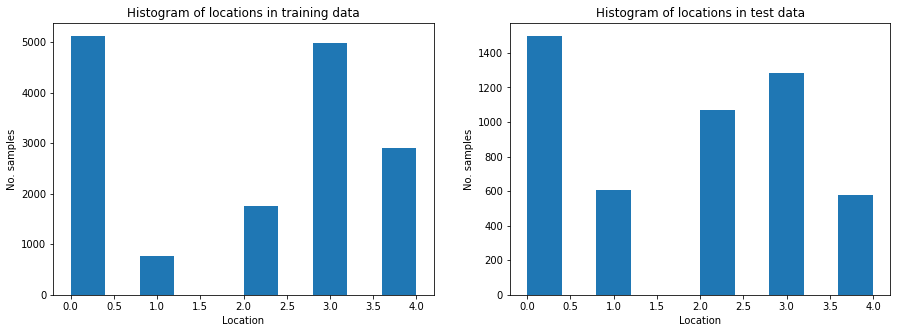

In [16]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

axs[0].hist(train_loc)
axs[0].set_title('Histogram of locations in training data')
axs[0].set(xlabel='Location', ylabel='No. samples')
axs[1].hist(test_loc)
axs[1].set_title('Histogram of locations in test data')
axs[1].set(xlabel='Location', ylabel='No. samples')

It seems that data were collected non-uniformly from locations. Also, the distribution is differnet in test data from training data. So, be careful!
Extract target variable

In [17]:
train_target = train['target'].values.astype(np.float32)

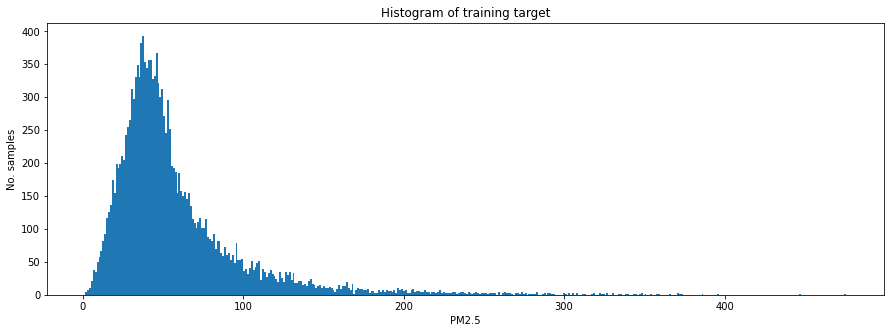

In [18]:
fig, axs = plt.subplots(1, figsize=(15,5))

axs.hist(train_target, bins=400)
axs.set_title('Histogram of training target')
axs.set(xlabel='PM2.5', ylabel='No. samples')
print()

## Data Preprocessing
As for the normalization, we will apply the usual standard scaling using mean and std of each weather factor excluding the missing values.